# Initial NFL 2022 Data Munging and Transformation by Skill Position

In [82]:
import pandas as pd #import pandas in to our code so we can use it
import plotly.express as px  
data1 = pd.read_csv('2021.csv') 
data2 = pd.read_csv('FantasyPros_2022_Overall_ADP_Rankings.csv') 

df = pd.merge(data1, data2, 
                   on = 'Player',
                   how ='left')
df.head(10)

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,FumblesLost,Rank,Team,Bye,POS,Yahoo,Fantrax,FFC,Sleeper,AVG
0,0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,...,2.0,1.0,IND,14.0,RB1,1.0,1.0,1.0,1.0,1.0
1,1,Cooper Kupp,LAR,WR,28,17,17,191.0,145.0,0.0,...,0.0,3.0,LAR,7.0,WR1,2.0,3.0,4.0,5.0,3.5
2,2,Deebo Samuel,SFO,WR,25,16,15,121.0,77.0,24.0,...,2.0,18.0,SF,9.0,WR7,19.0,15.0,18.0,24.0,19.0
3,3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,...,3.0,23.0,BUF,7.0,QB1,20.0,27.0,23.0,21.0,22.8
4,4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,...,3.0,2.0,LAC,8.0,RB2,3.0,2.0,3.0,4.0,3.0
5,5,Justin Herbert,LAC,QB,23,17,17,0.0,0.0,5014.0,...,1.0,37.0,LAC,8.0,QB3,36.0,41.0,38.0,36.0,37.8
6,6,Tom Brady,TAM,QB,44,17,17,0.0,0.0,5316.0,...,3.0,82.0,TB,11.0,QB10,60.0,93.0,91.0,85.0,82.3
7,7,Mark Andrews,BAL,TE,26,17,9,153.0,107.0,0.0,...,0.0,25.0,BAL,10.0,TE2,25.0,20.0,26.0,22.0,23.3
8,8,Ja'Marr Chase,CIN,WR,21,17,17,128.0,81.0,0.0,...,1.0,9.0,CIN,10.0,WR3,8.0,9.0,11.0,9.0,9.3
9,9,Justin Jefferson,MIN,WR,22,17,17,167.0,108.0,35.0,...,1.0,6.0,MIN,7.0,WR2,6.0,6.0,7.0,6.0,6.3


In [2]:
# Shape is just an attribute that tells us the shape of our DataFrame in the format (rows, columns)
print(df.shape) 
print('We have', df.shape[0], 'players we can analyze for the 2021 season')
print('We have', df.shape[1], 'columns of data we can analyze for the 2021 season')


(671, 30)
We have 671 players we can analyze for the 2021 season
We have 30 columns of data we can analyze for the 2021 season


In [3]:
# Displaying columns
df.columns

Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Tgt', 'Rec',
       'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD',
       'RushingAtt', 'ReceivingYds', 'ReceivingTD', 'FantasyPoints', 'Int',
       'Fumbles', 'FumblesLost', 'Rank', 'Team', 'Bye', 'POS', 'Yahoo',
       'Fantrax', 'FFC', 'Sleeper', 'AVG'],
      dtype='object')

In [29]:
# 2022 NFL RB Draft Order Data Frame 
draft_df = df[['Player', 'Tgt', 'Rec', 'G', 'ReceivingYds', 'RushingYds', 'RushingTD', 'RushingAtt', 'ReceivingTD', 'FantasyPoints', 'AVG']]

draft_df.head(10)

,Player,Tgt,Rec,G,ReceivingYds,RushingYds,RushingTD,RushingAtt,ReceivingTD,FantasyPoints,AVG
0,Jonathan Taylor,51.0,40.0,17,360.0,1811.0,18.0,332.0,2.0,333.0,1.0
1,Cooper Kupp,191.0,145.0,17,1947.0,18.0,0.0,4.0,16.0,295.0,3.5
2,Deebo Samuel,121.0,77.0,16,1405.0,365.0,8.0,59.0,6.0,262.0,19.0
3,Josh Allen,0.0,0.0,17,0.0,763.0,6.0,122.0,0.0,403.0,22.8
4,Austin Ekeler,94.0,70.0,16,647.0,911.0,12.0,206.0,8.0,274.0,3.0
5,Justin Herbert,0.0,0.0,17,0.0,302.0,3.0,63.0,0.0,381.0,37.8
6,Tom Brady,0.0,0.0,17,0.0,81.0,2.0,28.0,0.0,375.0,82.3
7,Mark Andrews,153.0,107.0,17,1361.0,0.0,0.0,1.0,9.0,194.0,23.3
8,Ja'Marr Chase,128.0,81.0,17,1455.0,21.0,0.0,7.0,13.0,224.0,9.3
9,Justin Jefferson,167.0,108.0,17,1616.0,14.0,0.0,6.0,10.0,222.0,6.3


In [30]:
# Changing column names from  G to Games (Played) and AVG to (ADP) Average Draft Position and viewing
draft_df = draft_df.rename(columns={'AVG':'ADP', 'G':'Games'})
draft_df.head(10)

,Player,Tgt,Rec,Games,ReceivingYds,RushingYds,RushingTD,RushingAtt,ReceivingTD,FantasyPoints,ADP
0,Jonathan Taylor,51.0,40.0,17,360.0,1811.0,18.0,332.0,2.0,333.0,1.0
1,Cooper Kupp,191.0,145.0,17,1947.0,18.0,0.0,4.0,16.0,295.0,3.5
2,Deebo Samuel,121.0,77.0,16,1405.0,365.0,8.0,59.0,6.0,262.0,19.0
3,Josh Allen,0.0,0.0,17,0.0,763.0,6.0,122.0,0.0,403.0,22.8
4,Austin Ekeler,94.0,70.0,16,647.0,911.0,12.0,206.0,8.0,274.0,3.0
5,Justin Herbert,0.0,0.0,17,0.0,302.0,3.0,63.0,0.0,381.0,37.8
6,Tom Brady,0.0,0.0,17,0.0,81.0,2.0,28.0,0.0,375.0,82.3
7,Mark Andrews,153.0,107.0,17,1361.0,0.0,0.0,1.0,9.0,194.0,23.3
8,Ja'Marr Chase,128.0,81.0,17,1455.0,21.0,0.0,7.0,13.0,224.0,9.3
9,Justin Jefferson,167.0,108.0,17,1616.0,14.0,0.0,6.0,10.0,222.0,6.3


# 2022 NFL Running Back Data

In [117]:
# Running Back Featured Columns with Usage Ranking and Total Yards From Scrimmage
rb_df = draft_df.loc[df['Pos'] == 'RB', ['Player', 'Tgt', 'Rec','RushingAtt', 'ReceivingYds','FantasyPoints', 'ADP', 'Games',]]
rb_df['Usage'] = ((df['Tgt'] + df['RushingAtt']) / draft_df['Games'])
rb_df['Touchdowns'] = df['RushingTD'] + df['ReceivingTD']
rb_df['TotYdsScrm']= df['ReceivingYds']+ df['RushingYds']

In [125]:
# Displaying RBs for 2021
rb_df.head(10) 

,Player,Tgt,Rec,RushingAtt,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
0,Jonathan Taylor,51.0,40.0,332.0,360.0,333.0,1.0,17,22.529412,20.0,2171.0,97.250653
4,Austin Ekeler,94.0,70.0,206.0,647.0,274.0,3.0,16,18.750000,20.0,1558.0,84.160000
10,Joe Mixon,48.0,42.0,292.0,314.0,246.0,9.8,16,21.250000,16.0,1519.0,72.235294
13,Najee Harris,94.0,74.0,307.0,467.0,227.0,7.3,17,23.588235,10.0,1667.0,71.094763
15,James Conner,39.0,37.0,202.0,375.0,221.0,31.8,15,16.066667,18.0,1127.0,71.265560
21,Ezekiel Elliott,65.0,47.0,237.0,287.0,205.0,29.8,17,17.764706,12.0,1289.0,73.235099
23,Nick Chubb,25.0,20.0,228.0,174.0,195.0,13.8,14,18.071429,9.0,1433.0,79.794466
27,Damien Harris,21.0,18.0,202.0,132.0,192.0,60.8,15,14.866667,15.0,1061.0,72.376682
31,Alvin Kamara,67.0,47.0,240.0,439.0,188.0,19.3,13,23.615385,9.0,1337.0,56.996743
32,Antonio Gibson,52.0,42.0,258.0,294.0,187.0,38.0,16,19.375000,10.0,1331.0,69.212903


In [140]:
# Cleaned RB df dropping na and nan values
rbc_df = rb_df.dropna(thresh=2, axis=1)
rbc_df.head(10)

,Player,Tgt,Rec,RushingAtt,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
0,Jonathan Taylor,51.0,40.0,332.0,360.0,333.0,1.0,17,22.529412,20.0,2171.0,97.250653
4,Austin Ekeler,94.0,70.0,206.0,647.0,274.0,3.0,16,18.750000,20.0,1558.0,84.160000
10,Joe Mixon,48.0,42.0,292.0,314.0,246.0,9.8,16,21.250000,16.0,1519.0,72.235294
13,Najee Harris,94.0,74.0,307.0,467.0,227.0,7.3,17,23.588235,10.0,1667.0,71.094763
15,James Conner,39.0,37.0,202.0,375.0,221.0,31.8,15,16.066667,18.0,1127.0,71.265560
21,Ezekiel Elliott,65.0,47.0,237.0,287.0,205.0,29.8,17,17.764706,12.0,1289.0,73.235099
23,Nick Chubb,25.0,20.0,228.0,174.0,195.0,13.8,14,18.071429,9.0,1433.0,79.794466
27,Damien Harris,21.0,18.0,202.0,132.0,192.0,60.8,15,14.866667,15.0,1061.0,72.376682
31,Alvin Kamara,67.0,47.0,240.0,439.0,188.0,19.3,13,23.615385,9.0,1337.0,56.996743
32,Antonio Gibson,52.0,42.0,258.0,294.0,187.0,38.0,16,19.375000,10.0,1331.0,69.212903


In [144]:
# Sorted by Average Draft Position
rbc_df.sort_values(by='ADP').head(10)

,Player,Tgt,Rec,RushingAtt,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
0,Jonathan Taylor,51.0,40.0,332.0,360.0,333.0,1.0,17,22.529412,20.0,2171.0,97.250653
4,Austin Ekeler,94.0,70.0,206.0,647.0,274.0,3.0,16,18.750000,20.0,1558.0,84.160000
43,Derrick Henry,20.0,18.0,219.0,154.0,175.0,3.8,8,29.875000,10.0,1091.0,36.853556
139,Christian McCaffrey,41.0,37.0,99.0,343.0,91.0,4.0,7,20.000000,2.0,785.0,39.350000
13,Najee Harris,94.0,74.0,307.0,467.0,227.0,7.3,17,23.588235,10.0,1667.0,71.094763
45,Dalvin Cook,49.0,34.0,249.0,224.0,172.0,7.8,13,22.923077,6.0,1383.0,60.593960
10,Joe Mixon,48.0,42.0,292.0,314.0,246.0,9.8,16,21.250000,16.0,1519.0,72.235294
23,Nick Chubb,25.0,20.0,228.0,174.0,195.0,13.8,14,18.071429,9.0,1433.0,79.794466
72,D'Andre Swift,78.0,62.0,151.0,452.0,147.0,14.5,13,17.615385,7.0,1069.0,61.082969
41,Aaron Jones,65.0,52.0,171.0,391.0,177.0,17.5,15,15.733333,10.0,1190.0,76.271186


In [145]:
# Sorted by Fantasy Production
rbc_df['Production'] = ((df['RushingTD'] + df['ReceivingTD'] + df['RushingYds'] + df['ReceivingYds']) / rb_df['Usage'])
rbc_df.head(10)

,Player,Tgt,Rec,RushingAtt,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
0,Jonathan Taylor,51.0,40.0,332.0,360.0,333.0,1.0,17,22.529412,20.0,2171.0,97.250653
4,Austin Ekeler,94.0,70.0,206.0,647.0,274.0,3.0,16,18.750000,20.0,1558.0,84.160000
10,Joe Mixon,48.0,42.0,292.0,314.0,246.0,9.8,16,21.250000,16.0,1519.0,72.235294
13,Najee Harris,94.0,74.0,307.0,467.0,227.0,7.3,17,23.588235,10.0,1667.0,71.094763
15,James Conner,39.0,37.0,202.0,375.0,221.0,31.8,15,16.066667,18.0,1127.0,71.265560
21,Ezekiel Elliott,65.0,47.0,237.0,287.0,205.0,29.8,17,17.764706,12.0,1289.0,73.235099
23,Nick Chubb,25.0,20.0,228.0,174.0,195.0,13.8,14,18.071429,9.0,1433.0,79.794466
27,Damien Harris,21.0,18.0,202.0,132.0,192.0,60.8,15,14.866667,15.0,1061.0,72.376682
31,Alvin Kamara,67.0,47.0,240.0,439.0,188.0,19.3,13,23.615385,9.0,1337.0,56.996743
32,Antonio Gibson,52.0,42.0,258.0,294.0,187.0,38.0,16,19.375000,10.0,1331.0,69.212903


In [147]:
# Fantasy Point Ranks
rbc_df['Production'] = rb_df.groupby('ADP')['Production'].rank(ascending=False)
rbc_df.head(10)

,Player,Tgt,Rec,RushingAtt,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production,FantasyRank,FantasyPointsRank
0,Jonathan Taylor,51.0,40.0,332.0,360.0,333.0,1.0,17,22.529412,20.0,2171.0,1.0,9.0,1.0
4,Austin Ekeler,94.0,70.0,206.0,647.0,274.0,3.0,16,18.750000,20.0,1558.0,1.0,19.0,2.0
10,Joe Mixon,48.0,42.0,292.0,314.0,246.0,9.8,16,21.250000,16.0,1519.0,1.0,39.0,3.0
13,Najee Harris,94.0,74.0,307.0,467.0,227.0,7.3,17,23.588235,10.0,1667.0,1.0,42.0,4.0
15,James Conner,39.0,37.0,202.0,375.0,221.0,31.8,15,16.066667,18.0,1127.0,1.0,41.0,5.0
21,Ezekiel Elliott,65.0,47.0,237.0,287.0,205.0,29.8,17,17.764706,12.0,1289.0,1.0,35.0,6.0
23,Nick Chubb,25.0,20.0,228.0,174.0,195.0,13.8,14,18.071429,9.0,1433.0,1.0,24.0,7.0
27,Damien Harris,21.0,18.0,202.0,132.0,192.0,60.8,15,14.866667,15.0,1061.0,1.0,37.0,8.0
31,Alvin Kamara,67.0,47.0,240.0,439.0,188.0,19.3,13,23.615385,9.0,1337.0,1.0,77.0,9.0
32,Antonio Gibson,52.0,42.0,258.0,294.0,187.0,38.0,16,19.375000,10.0,1331.0,1.0,46.0,10.5


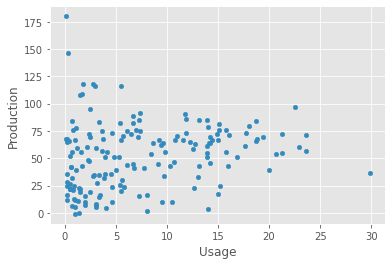

In [148]:
# Plotting the data
from matplotlib import pyplot as plt

plt.style.use('ggplot')

rb_df.plot(x='Usage', y='Production', kind='scatter')

# 2022 NFL Wide Receiver Data

In [123]:
# Creating Wide Reciever DF 2022 NFL RB Draft Order Data Frame 
wr_df = draft_df.loc[df['Pos'] == 'WR', ['Player', 'Tgt','RushingTD', 'ReceivingTD','Rec', 'RushingAtt','RushingYds', 'ReceivingYds','FantasyPoints', 'ADP', 'Games']]
wr_df['Usage'] = ((df['Tgt'] + df['Rec']) / draft_df['Games'])
wr_df['Touchdowns'] = df['RushingTD'] + df['ReceivingTD']
wr_df['TotYdsScrm']= df['ReceivingYds']+ df['RushingYds']

In [124]:
# Displaying WR Columns
wr_df.head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm
1,Cooper Kupp,191.0,0.0,16.0,145.0,4.0,18.0,1947.0,295.0,3.5,17,19.764706,16.0,1965.0
2,Deebo Samuel,121.0,8.0,6.0,77.0,59.0,365.0,1405.0,262.0,19.0,16,12.375000,14.0,1770.0
8,Ja'Marr Chase,128.0,0.0,13.0,81.0,7.0,21.0,1455.0,224.0,9.3,17,12.294118,13.0,1476.0
9,Justin Jefferson,167.0,0.0,10.0,108.0,6.0,14.0,1616.0,222.0,6.3,17,16.176471,10.0,1630.0
11,Davante Adams,169.0,0.0,11.0,123.0,0.0,0.0,1553.0,221.0,11.5,16,18.250000,11.0,1553.0
16,Mike Evans,114.0,0.0,14.0,74.0,1.0,10.0,1035.0,189.0,25.0,16,11.750000,14.0,1045.0
18,Tyreek Hill,159.0,0.0,9.0,111.0,9.0,96.0,1239.0,186.0,21.8,17,15.882353,9.0,1335.0
20,Stefon Diggs,164.0,0.0,10.0,103.0,0.0,0.0,1225.0,183.0,12.8,17,15.705882,10.0,1225.0
24,Mike Williams,129.0,0.0,9.0,76.0,0.0,0.0,1146.0,171.0,49.3,16,12.812500,9.0,1146.0
25,D.K. Metcalf,129.0,0.0,12.0,75.0,1.0,6.0,967.0,169.0,NaN,17,12.000000,12.0,973.0


In [132]:
# Cleaned WR df dropping na and nan values
wrc_df = wr_df.dropna(thresh=2, axis=1)
wrc_df.head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
1,Cooper Kupp,191.0,0.0,16.0,145.0,4.0,18.0,1947.0,295.0,3.5,17,19.764706,16.0,1965.0,100.229167
2,Deebo Samuel,121.0,8.0,6.0,77.0,59.0,365.0,1405.0,262.0,19.0,16,12.375000,14.0,1770.0,144.161616
8,Ja'Marr Chase,128.0,0.0,13.0,81.0,7.0,21.0,1455.0,224.0,9.3,17,12.294118,13.0,1476.0,121.114833
9,Justin Jefferson,167.0,0.0,10.0,108.0,6.0,14.0,1616.0,222.0,6.3,17,16.176471,10.0,1630.0,101.381818
11,Davante Adams,169.0,0.0,11.0,123.0,0.0,0.0,1553.0,221.0,11.5,16,18.250000,11.0,1553.0,85.698630
16,Mike Evans,114.0,0.0,14.0,74.0,1.0,10.0,1035.0,189.0,25.0,16,11.750000,14.0,1045.0,90.127660
18,Tyreek Hill,159.0,0.0,9.0,111.0,9.0,96.0,1239.0,186.0,21.8,17,15.882353,9.0,1335.0,84.622222
20,Stefon Diggs,164.0,0.0,10.0,103.0,0.0,0.0,1225.0,183.0,12.8,17,15.705882,10.0,1225.0,78.632959
24,Mike Williams,129.0,0.0,9.0,76.0,0.0,0.0,1146.0,171.0,49.3,16,12.812500,9.0,1146.0,90.146341
25,D.K. Metcalf,129.0,0.0,12.0,75.0,1.0,6.0,967.0,169.0,NaN,17,12.000000,12.0,973.0,82.083333


In [133]:
# Displaying Ranked WRs by Average Draft Position for 2022
wrc_df.sort_values(by='ADP').head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
1,Cooper Kupp,191.0,0.0,16.0,145.0,4.0,18.0,1947.0,295.0,3.5,17,19.764706,16.0,1965.0,100.229167
9,Justin Jefferson,167.0,0.0,10.0,108.0,6.0,14.0,1616.0,222.0,6.3,17,16.176471,10.0,1630.0,101.381818
8,Ja'Marr Chase,128.0,0.0,13.0,81.0,7.0,21.0,1455.0,224.0,9.3,17,12.294118,13.0,1476.0,121.114833
11,Davante Adams,169.0,0.0,11.0,123.0,0.0,0.0,1553.0,221.0,11.5,16,18.250000,11.0,1553.0,85.698630
20,Stefon Diggs,164.0,0.0,10.0,103.0,0.0,0.0,1225.0,183.0,12.8,17,15.705882,10.0,1225.0,78.632959
38,CeeDee Lamb,120.0,0.0,6.0,79.0,9.0,76.0,1102.0,154.0,17.5,16,12.437500,6.0,1178.0,95.195980
2,Deebo Samuel,121.0,8.0,6.0,77.0,59.0,365.0,1405.0,262.0,19.0,16,12.375000,14.0,1770.0,144.161616
18,Tyreek Hill,159.0,0.0,9.0,111.0,9.0,96.0,1239.0,186.0,21.8,17,15.882353,9.0,1335.0,84.622222
16,Mike Evans,114.0,0.0,14.0,74.0,1.0,10.0,1035.0,189.0,25.0,16,11.750000,14.0,1045.0,90.127660
103,A.J. Brown,105.0,0.0,5.0,63.0,2.0,10.0,869.0,118.0,28.5,13,12.923077,5.0,879.0,68.404762


In [134]:
# Wide Receivers then sorted by Fantasy 'Production'
wrc_df['Production'] = ((df['RushingTD'] + df['ReceivingTD'] + df['RushingYds'] + df['ReceivingYds']) / wr_df['Usage'])
wrc_df.head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
1,Cooper Kupp,191.0,0.0,16.0,145.0,4.0,18.0,1947.0,295.0,3.5,17,19.764706,16.0,1965.0,100.229167
2,Deebo Samuel,121.0,8.0,6.0,77.0,59.0,365.0,1405.0,262.0,19.0,16,12.375000,14.0,1770.0,144.161616
8,Ja'Marr Chase,128.0,0.0,13.0,81.0,7.0,21.0,1455.0,224.0,9.3,17,12.294118,13.0,1476.0,121.114833
9,Justin Jefferson,167.0,0.0,10.0,108.0,6.0,14.0,1616.0,222.0,6.3,17,16.176471,10.0,1630.0,101.381818
11,Davante Adams,169.0,0.0,11.0,123.0,0.0,0.0,1553.0,221.0,11.5,16,18.250000,11.0,1553.0,85.698630
16,Mike Evans,114.0,0.0,14.0,74.0,1.0,10.0,1035.0,189.0,25.0,16,11.750000,14.0,1045.0,90.127660
18,Tyreek Hill,159.0,0.0,9.0,111.0,9.0,96.0,1239.0,186.0,21.8,17,15.882353,9.0,1335.0,84.622222
20,Stefon Diggs,164.0,0.0,10.0,103.0,0.0,0.0,1225.0,183.0,12.8,17,15.705882,10.0,1225.0,78.632959
24,Mike Williams,129.0,0.0,9.0,76.0,0.0,0.0,1146.0,171.0,49.3,16,12.812500,9.0,1146.0,90.146341
25,D.K. Metcalf,129.0,0.0,12.0,75.0,1.0,6.0,967.0,169.0,NaN,17,12.000000,12.0,973.0,82.083333


In [136]:
# Wide Receivers ranked by 'Production'
wrc_df['Production'] = wr_df.groupby('ADP')['Production'].rank(ascending=False)
wrc_df.head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
1,Cooper Kupp,191.0,0.0,16.0,145.0,4.0,18.0,1947.0,295.0,3.5,17,19.764706,16.0,1965.0,1.0
2,Deebo Samuel,121.0,8.0,6.0,77.0,59.0,365.0,1405.0,262.0,19.0,16,12.375000,14.0,1770.0,1.0
8,Ja'Marr Chase,128.0,0.0,13.0,81.0,7.0,21.0,1455.0,224.0,9.3,17,12.294118,13.0,1476.0,1.0
9,Justin Jefferson,167.0,0.0,10.0,108.0,6.0,14.0,1616.0,222.0,6.3,17,16.176471,10.0,1630.0,1.0
11,Davante Adams,169.0,0.0,11.0,123.0,0.0,0.0,1553.0,221.0,11.5,16,18.250000,11.0,1553.0,1.0
16,Mike Evans,114.0,0.0,14.0,74.0,1.0,10.0,1035.0,189.0,25.0,16,11.750000,14.0,1045.0,1.0
18,Tyreek Hill,159.0,0.0,9.0,111.0,9.0,96.0,1239.0,186.0,21.8,17,15.882353,9.0,1335.0,1.0
20,Stefon Diggs,164.0,0.0,10.0,103.0,0.0,0.0,1225.0,183.0,12.8,17,15.705882,10.0,1225.0,1.0
24,Mike Williams,129.0,0.0,9.0,76.0,0.0,0.0,1146.0,171.0,49.3,16,12.812500,9.0,1146.0,1.0
25,D.K. Metcalf,129.0,0.0,12.0,75.0,1.0,6.0,967.0,169.0,NaN,17,12.000000,12.0,973.0,20.0


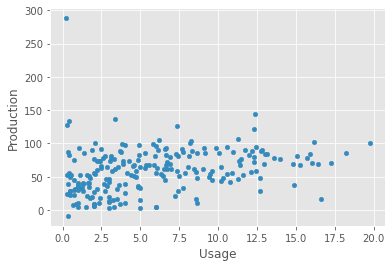

In [139]:
# Plotting Data 
from matplotlib import pyplot as plt

plt.style.use('ggplot')

wr_df.plot(x='Usage', y='Production', kind='scatter')

# 2022 NFL Tight End Summary

In [149]:
# Creating Tight End DF 2022 NFL RB Draft Order Data Frame 
TE_df = draft_df.loc[df['Pos'] == 'TE', ['Player', 'Tgt','RushingTD', 'ReceivingTD','Rec', 'RushingAtt','RushingYds', 'ReceivingYds','FantasyPoints', 'ADP', 'Games']]
TE_df['Usage'] = ((df['Tgt'] + df['Rec']) / draft_df['Games'])
TE_df['Touchdowns'] = df['RushingTD'] + df['ReceivingTD']
TE_df['TotYdsScrm']= df['ReceivingYds']+ df['RushingYds']

In [150]:
# Displaying WRs for 2021
TE_df.sort_values(by='ADP').head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm
14,Travis Kelce,134.0,1.0,9.0,92.0,2.0,3.0,1125.0,171.0,14.0,16,14.125000,10.0,1128.0
7,Mark Andrews,153.0,0.0,9.0,107.0,1.0,0.0,1361.0,194.0,23.3,17,15.294118,9.0,1361.0
36,George Kittle,94.0,0.0,6.0,71.0,3.0,20.0,910.0,127.0,42.8,14,11.785714,6.0,930.0
169,Darren Waller,93.0,0.0,2.0,55.0,0.0,0.0,665.0,79.0,46.8,11,13.454545,2.0,665.0
34,Dalton Schultz,104.0,0.0,8.0,78.0,0.0,0.0,808.0,131.0,64.8,17,10.705882,8.0,808.0
156,T.J. Hockenson,84.0,0.0,4.0,61.0,0.0,0.0,583.0,84.0,64.8,12,12.083333,4.0,583.0
56,Dallas Goedert,76.0,0.0,4.0,56.0,0.0,0.0,830.0,109.0,79.0,15,8.800000,4.0,830.0
49,Dawson Knox,71.0,0.0,9.0,49.0,0.0,4.0,587.0,115.0,90.5,15,8.000000,9.0,591.0
61,Zach Ertz,112.0,0.0,5.0,74.0,1.0,4.0,763.0,107.0,97.0,17,10.941176,5.0,767.0
73,Mike Gesicki,112.0,0.0,2.0,73.0,0.0,0.0,780.0,92.0,113.5,17,10.882353,2.0,780.0


In [152]:
# Cleaned TE df dropping na and nan values
TEc_df = TE_df.dropna(thresh=2, axis=1)
TEc_df.head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm
7,Mark Andrews,153.0,0.0,9.0,107.0,1.0,0.0,1361.0,194.0,23.3,17,15.294118,9.0,1361.0
14,Travis Kelce,134.0,1.0,9.0,92.0,2.0,3.0,1125.0,171.0,14.0,16,14.125000,10.0,1128.0
34,Dalton Schultz,104.0,0.0,8.0,78.0,0.0,0.0,808.0,131.0,64.8,17,10.705882,8.0,808.0
36,George Kittle,94.0,0.0,6.0,71.0,3.0,20.0,910.0,127.0,42.8,14,11.785714,6.0,930.0
47,Rob Gronkowski,89.0,0.0,6.0,55.0,0.0,0.0,802.0,116.0,NaN,12,12.000000,6.0,802.0
49,Dawson Knox,71.0,0.0,9.0,49.0,0.0,4.0,587.0,115.0,90.5,15,8.000000,9.0,591.0
52,Hunter Henry,75.0,0.0,9.0,50.0,0.0,0.0,603.0,114.0,168.5,17,7.352941,9.0,603.0
56,Dallas Goedert,76.0,0.0,4.0,56.0,0.0,0.0,830.0,109.0,79.0,15,8.800000,4.0,830.0
58,Kyle Pitts*,110.0,0.0,1.0,68.0,0.0,0.0,1026.0,109.0,NaN,17,10.470588,1.0,1026.0
61,Zach Ertz,112.0,0.0,5.0,74.0,1.0,4.0,763.0,107.0,97.0,17,10.941176,5.0,767.0


In [166]:
# Sorted by Fantasy Production
TEc_df['Production'] =  ((df['RushingTD'] + df['ReceivingTD'] + df['RushingYds'] + df['ReceivingYds']) / TE_df['Usage'])
TEc_df.head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
7,Mark Andrews,153.0,0.0,9.0,107.0,1.0,0.0,1361.0,194.0,23.3,17,15.294118,9.0,1361.0,89.576923
14,Travis Kelce,134.0,1.0,9.0,92.0,2.0,3.0,1125.0,171.0,14.0,16,14.125000,10.0,1128.0,80.566372
34,Dalton Schultz,104.0,0.0,8.0,78.0,0.0,0.0,808.0,131.0,64.8,17,10.705882,8.0,808.0,76.219780
36,George Kittle,94.0,0.0,6.0,71.0,3.0,20.0,910.0,127.0,42.8,14,11.785714,6.0,930.0,79.418182
47,Rob Gronkowski,89.0,0.0,6.0,55.0,0.0,0.0,802.0,116.0,NaN,12,12.000000,6.0,802.0,67.333333
49,Dawson Knox,71.0,0.0,9.0,49.0,0.0,4.0,587.0,115.0,90.5,15,8.000000,9.0,591.0,75.000000
52,Hunter Henry,75.0,0.0,9.0,50.0,0.0,0.0,603.0,114.0,168.5,17,7.352941,9.0,603.0,83.232000
56,Dallas Goedert,76.0,0.0,4.0,56.0,0.0,0.0,830.0,109.0,79.0,15,8.800000,4.0,830.0,94.772727
58,Kyle Pitts*,110.0,0.0,1.0,68.0,0.0,0.0,1026.0,109.0,NaN,17,10.470588,1.0,1026.0,98.084270
61,Zach Ertz,112.0,0.0,5.0,74.0,1.0,4.0,763.0,107.0,97.0,17,10.941176,5.0,767.0,70.559140


In [167]:
# Tight Ends ranked by 'Production'
TEc_df['Production'] = wr_df.groupby('ADP')['Production'].rank(ascending=False)
TEc_df.head(10)

,Player,Tgt,RushingTD,ReceivingTD,Rec,RushingAtt,RushingYds,ReceivingYds,FantasyPoints,ADP,Games,Usage,Touchdowns,TotYdsScrm,Production
7,Mark Andrews,153.0,0.0,9.0,107.0,1.0,0.0,1361.0,194.0,23.3,17,15.294118,9.0,1361.0,NaN
14,Travis Kelce,134.0,1.0,9.0,92.0,2.0,3.0,1125.0,171.0,14.0,16,14.125000,10.0,1128.0,NaN
34,Dalton Schultz,104.0,0.0,8.0,78.0,0.0,0.0,808.0,131.0,64.8,17,10.705882,8.0,808.0,NaN
36,George Kittle,94.0,0.0,6.0,71.0,3.0,20.0,910.0,127.0,42.8,14,11.785714,6.0,930.0,NaN
47,Rob Gronkowski,89.0,0.0,6.0,55.0,0.0,0.0,802.0,116.0,NaN,12,12.000000,6.0,802.0,NaN
49,Dawson Knox,71.0,0.0,9.0,49.0,0.0,4.0,587.0,115.0,90.5,15,8.000000,9.0,591.0,NaN
52,Hunter Henry,75.0,0.0,9.0,50.0,0.0,0.0,603.0,114.0,168.5,17,7.352941,9.0,603.0,NaN
56,Dallas Goedert,76.0,0.0,4.0,56.0,0.0,0.0,830.0,109.0,79.0,15,8.800000,4.0,830.0,NaN
58,Kyle Pitts*,110.0,0.0,1.0,68.0,0.0,0.0,1026.0,109.0,NaN,17,10.470588,1.0,1026.0,NaN
61,Zach Ertz,112.0,0.0,5.0,74.0,1.0,4.0,763.0,107.0,97.0,17,10.941176,5.0,767.0,NaN


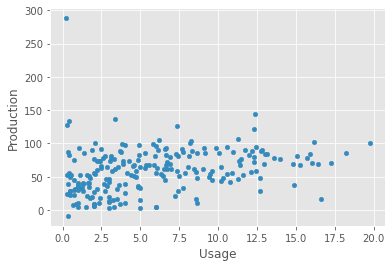

In [168]:
# Plotting Data 
from matplotlib import pyplot as plt

plt.style.use('ggplot')

wr_df.plot(x='Usage', y='Production', kind='scatter')

# 2022 NFL Quarterback Position Data

In [159]:
# 2022 NFL Quarterback Draft Order Data Frame 
quarter_df = df[['Player', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD','FantasyPoints', 'G', 'AVG']]

quarter_df.head(10)

,Player,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,FantasyPoints,G,AVG
0,Jonathan Taylor,0.0,0.0,0.0,1811.0,18.0,333.0,17,1.0
1,Cooper Kupp,0.0,0.0,1.0,18.0,0.0,295.0,17,3.5
2,Deebo Samuel,24.0,1.0,2.0,365.0,8.0,262.0,16,19.0
3,Josh Allen,4407.0,36.0,646.0,763.0,6.0,403.0,17,22.8
4,Austin Ekeler,0.0,0.0,0.0,911.0,12.0,274.0,16,3.0
5,Justin Herbert,5014.0,38.0,672.0,302.0,3.0,381.0,17,37.8
6,Tom Brady,5316.0,43.0,719.0,81.0,2.0,375.0,17,82.3
7,Mark Andrews,0.0,0.0,0.0,0.0,0.0,194.0,17,23.3
8,Ja'Marr Chase,0.0,0.0,0.0,21.0,0.0,224.0,17,9.3
9,Justin Jefferson,35.0,0.0,4.0,14.0,0.0,222.0,17,6.3


In [164]:
# Creating Quarterback DF 2022 NFL RB Draft Order Data Frame 
QB_df = quarter_df.loc[df['Pos'] == 'QB', ['Player', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD','FantasyPoints', 'AVG', 'G']]
QB_df['Production'] = ((df['PassingYds'] + df['PassingTD']) / df['G'])
QB_df['Touchdowns'] = df['RushingTD'] + df['PassingTD']
QB_df['TotYdsScrm']= df['PassingYds'] + df ['RushingYds']
QB_df.head(10)

,Player,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,FantasyPoints,AVG,G,Production,Touchdowns,TotYdsScrm
3,Josh Allen,4407.0,36.0,646.0,763.0,6.0,403.0,22.8,17,261.352941,42.0,5170.0
5,Justin Herbert,5014.0,38.0,672.0,302.0,3.0,381.0,37.8,17,297.176471,41.0,5316.0
6,Tom Brady,5316.0,43.0,719.0,81.0,2.0,375.0,82.3,17,315.235294,45.0,5397.0
12,Patrick Mahomes,4839.0,37.0,658.0,381.0,2.0,362.0,NaN,17,286.823529,39.0,5220.0
17,Aaron Rodgers,4115.0,37.0,531.0,101.0,3.0,332.0,92.8,16,259.500000,40.0,4216.0
19,Matthew Stafford,4886.0,41.0,601.0,43.0,0.0,330.0,86.8,17,289.823529,41.0,4929.0
22,Dak Prescott,4449.0,37.0,596.0,146.0,1.0,321.0,76.0,16,280.375000,38.0,4595.0
28,Joe Burrow,4611.0,34.0,520.0,118.0,2.0,314.0,56.5,16,290.312500,36.0,4729.0
30,Jalen Hurts,3144.0,16.0,432.0,784.0,10.0,312.0,66.8,15,210.666667,26.0,3928.0
39,Kyler Murray,3787.0,24.0,481.0,423.0,5.0,300.0,59.3,14,272.214286,29.0,4210.0


In [165]:
QBc_df = QB_df.dropna(thresh=2, axis=1)
QBc_df.head(10)

,Player,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,FantasyPoints,AVG,G,Production,Touchdowns,TotYdsScrm
3,Josh Allen,4407.0,36.0,646.0,763.0,6.0,403.0,22.8,17,261.352941,42.0,5170.0
5,Justin Herbert,5014.0,38.0,672.0,302.0,3.0,381.0,37.8,17,297.176471,41.0,5316.0
6,Tom Brady,5316.0,43.0,719.0,81.0,2.0,375.0,82.3,17,315.235294,45.0,5397.0
12,Patrick Mahomes,4839.0,37.0,658.0,381.0,2.0,362.0,NaN,17,286.823529,39.0,5220.0
17,Aaron Rodgers,4115.0,37.0,531.0,101.0,3.0,332.0,92.8,16,259.500000,40.0,4216.0
19,Matthew Stafford,4886.0,41.0,601.0,43.0,0.0,330.0,86.8,17,289.823529,41.0,4929.0
22,Dak Prescott,4449.0,37.0,596.0,146.0,1.0,321.0,76.0,16,280.375000,38.0,4595.0
28,Joe Burrow,4611.0,34.0,520.0,118.0,2.0,314.0,56.5,16,290.312500,36.0,4729.0
30,Jalen Hurts,3144.0,16.0,432.0,784.0,10.0,312.0,66.8,15,210.666667,26.0,3928.0
39,Kyler Murray,3787.0,24.0,481.0,423.0,5.0,300.0,59.3,14,272.214286,29.0,4210.0


In [170]:
# Quarterbacks ranked by 'Production'
QBc_df['Production'] = QBc_df.groupby('AVG')['Production'].rank(ascending=False)
QBc_df.head(10)

,Player,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,FantasyPoints,AVG,G,Production,Touchdowns,TotYdsScrm
3,Josh Allen,4407.0,36.0,646.0,763.0,6.0,403.0,22.8,17,1.0,42.0,5170.0
5,Justin Herbert,5014.0,38.0,672.0,302.0,3.0,381.0,37.8,17,1.0,41.0,5316.0
6,Tom Brady,5316.0,43.0,719.0,81.0,2.0,375.0,82.3,17,1.0,45.0,5397.0
12,Patrick Mahomes,4839.0,37.0,658.0,381.0,2.0,362.0,NaN,17,1.0,39.0,5220.0
17,Aaron Rodgers,4115.0,37.0,531.0,101.0,3.0,332.0,92.8,16,1.0,40.0,4216.0
19,Matthew Stafford,4886.0,41.0,601.0,43.0,0.0,330.0,86.8,17,1.0,41.0,4929.0
22,Dak Prescott,4449.0,37.0,596.0,146.0,1.0,321.0,76.0,16,1.0,38.0,4595.0
28,Joe Burrow,4611.0,34.0,520.0,118.0,2.0,314.0,56.5,16,1.0,36.0,4729.0
30,Jalen Hurts,3144.0,16.0,432.0,784.0,10.0,312.0,66.8,15,1.0,26.0,3928.0
39,Kyler Murray,3787.0,24.0,481.0,423.0,5.0,300.0,59.3,14,1.0,29.0,4210.0


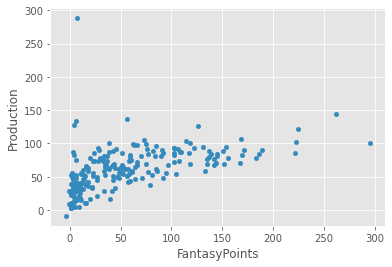

In [171]:
# Plotting Data 
from matplotlib import pyplot as plt

plt.style.use('ggplot')

wr_df.plot(x='FantasyPoints', y='Production', kind='scatter')